In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


1. Importing dependencies and handling missing values

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")
sns.set_style(style="whitegrid")
# plt.rcParams['figure.figsize'] = (5, 5)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [ ]:
df.shape

(5110, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
# Dropping unnecessary columns
df2 = df.drop(['id'],axis=1)
df2.shape

(5110, 11)

In [ ]:
# Dropping duplicates
df3 = df2.drop_duplicates()
df3.shape

(5110, 11)

In [ ]:
# Checking for null values
df3.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
# Dropping all the null values
df4 = df3.dropna()
df4.isnull().sum().sum()

0

2. Data visualization

In [ ]:
df4.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

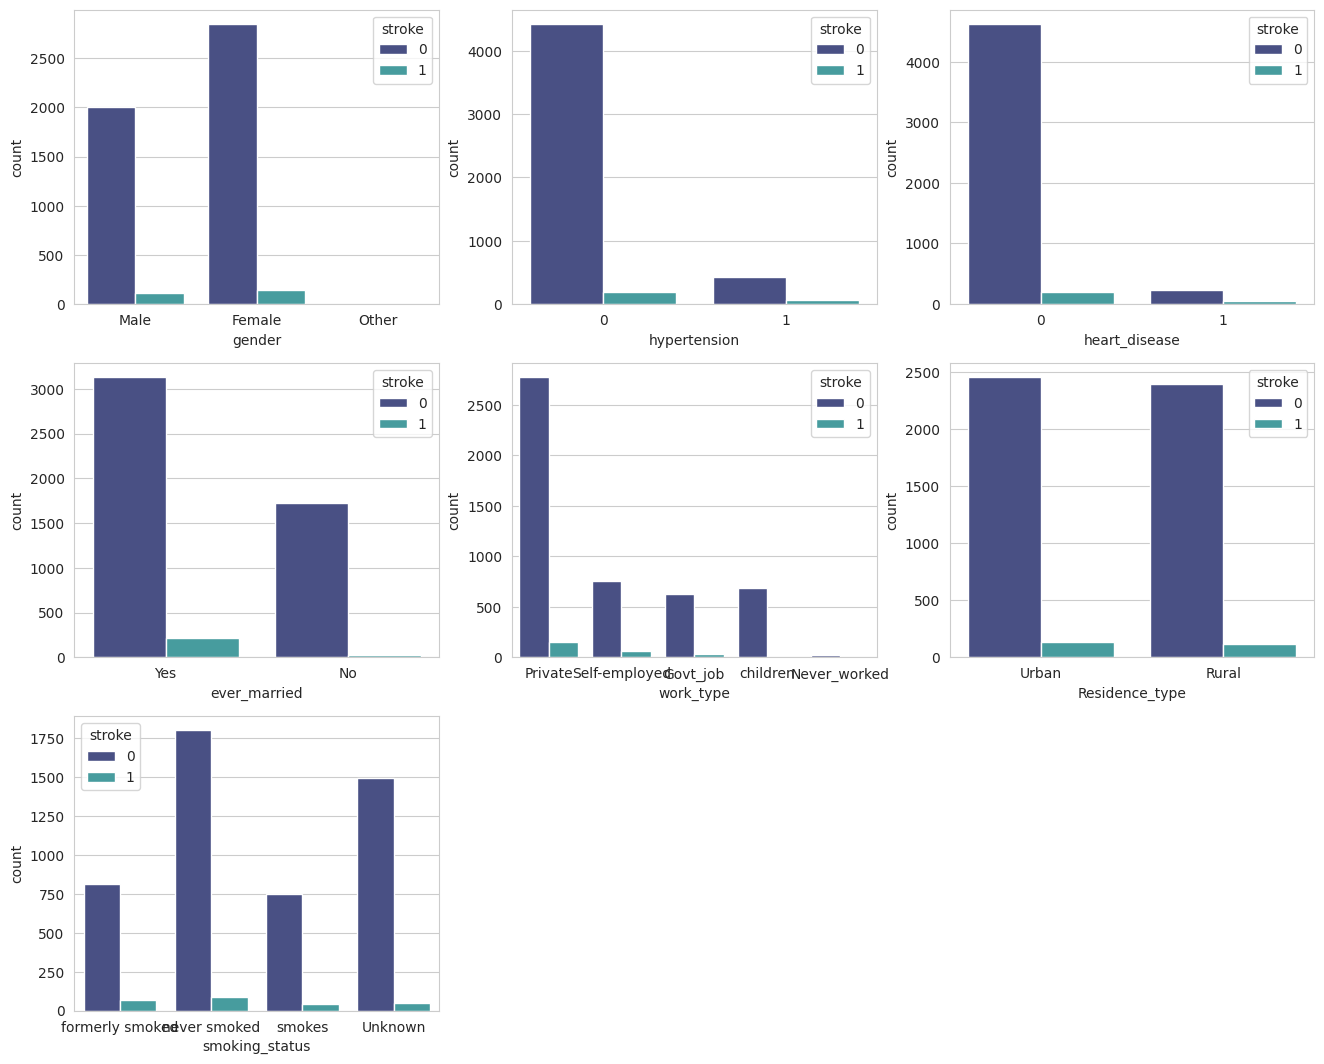

In [ ]:
# Visualizing categorical datas
cols = ['gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type',
       'smoking_status']
plt.figure(figsize=(16,13))
for i in range(len(cols)):
    plt.subplot(3,3,i+1)

    sns.countplot(x=df[cols[i]],hue = df['stroke'],palette = 'mako')


Text(0.5, 1.0, 'Smoking Status ')

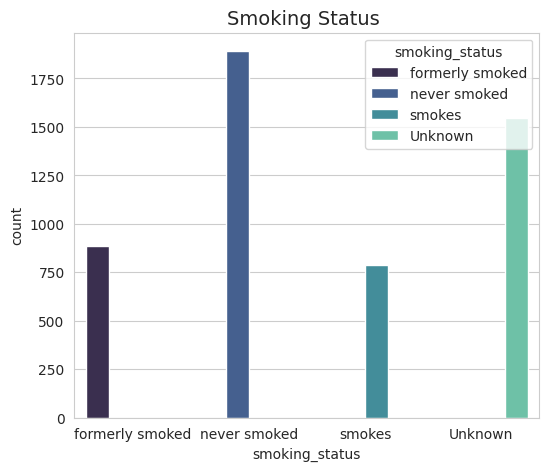

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(x=df['smoking_status'],palette='mako', hue=df['smoking_status'])
plt.title('Smoking Status ' , size = 14)
# plt.xlabel('Count',size = 12)

<Axes: xlabel='gender', ylabel='count'>

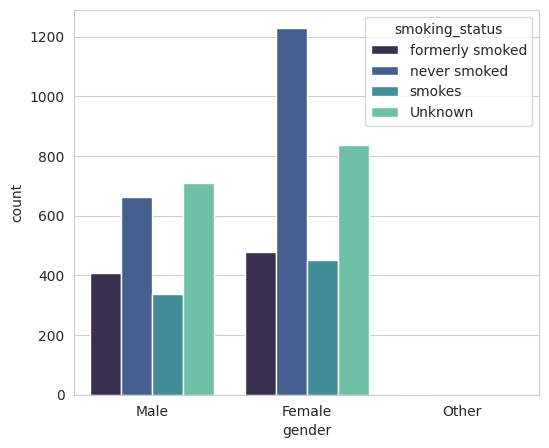

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(x=df['gender'],palette='mako', hue=df['smoking_status'])
# plt.title('Smoking Status ' , size = 14)

3. Feature Engineering

3.1 Handling categorical values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df4.columns:
    if df4[col].dtypes != "float64":
        df4[col] = le.fit_transform(df4[col])
df4.dtypes

gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

3.2 Handling outlier

3.2.1 Checking for skewed columns

In [ ]:
# Close to zero
print(f"Age: {df4['age'].skew()}")

# More than 1, right skewed
print(f"BMI: {df4['bmi'].skew()}")

# More than 1, right skewed
print(f"Avg glucose level: {df4['avg_glucose_level'].skew()}")

Age: -0.11906951773810705
BMI: 1.0553402052962928
Avg glucose level: 1.6140261970592311


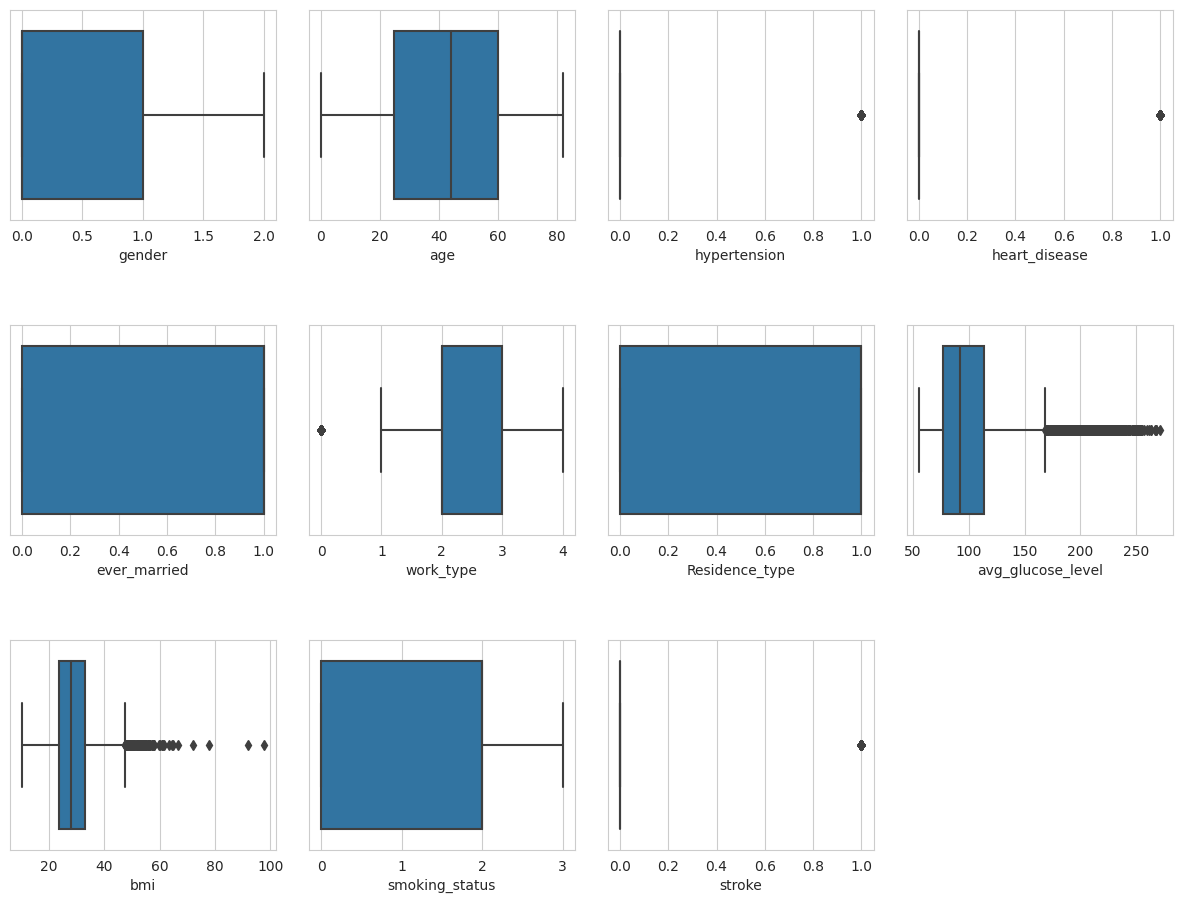

In [ ]:
num_cols = df4.columns.tolist()
plt.figure(figsize=(15, 15))

for i in range(len(num_cols)):
    plt.subplots_adjust(hspace=.5, wspace=.125)
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=df4[num_cols[i]])

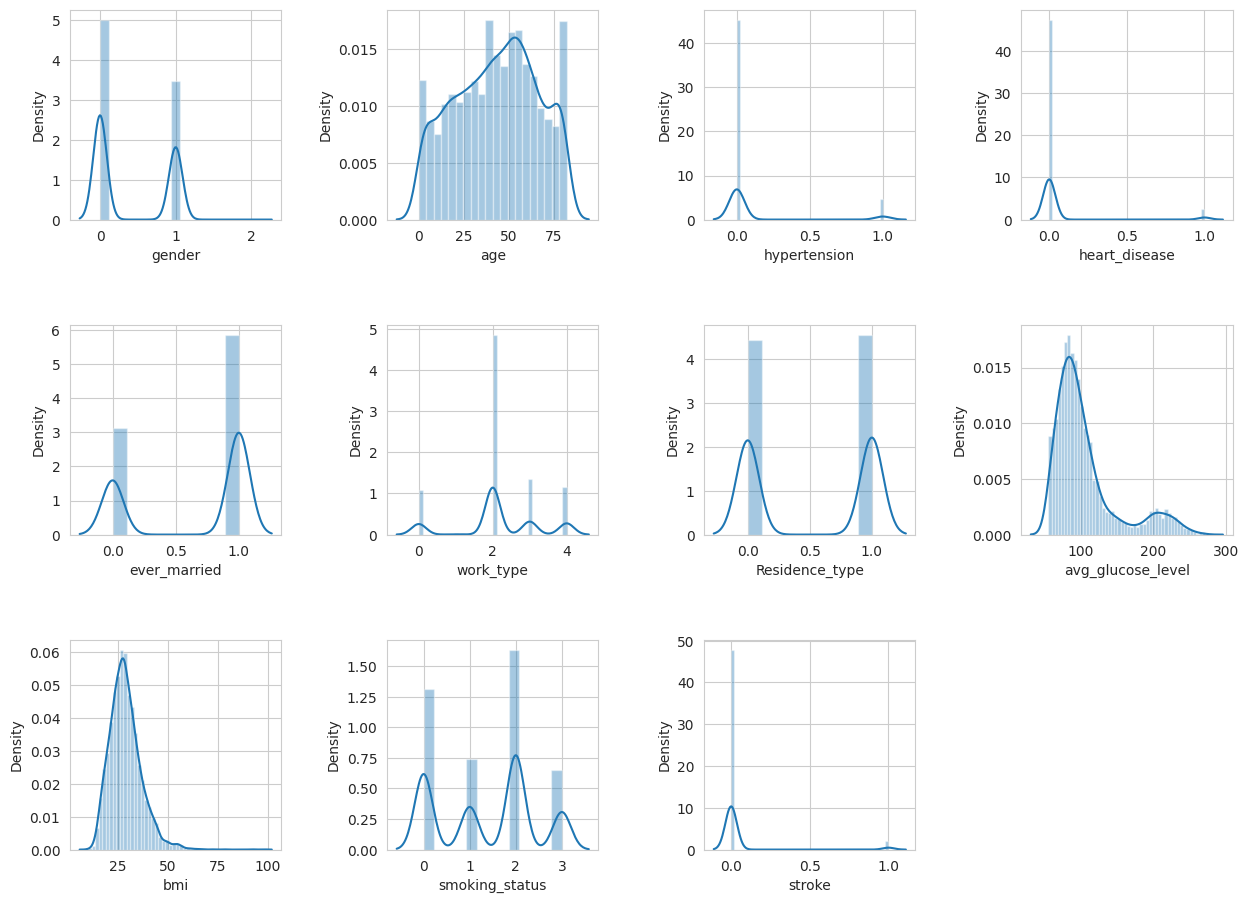

In [ ]:
plt.figure(figsize=(15, 15))

for i in range(len(num_cols)):
    plt.subplots_adjust(hspace=.5, wspace=.5)
    plt.subplot(4, 4, i+1)
    sns.distplot(df4[num_cols[i]])
#     plt.title(num_cols[i])

3.2.2 Detecting the outliers using Interquartile range (IQR)

In [ ]:
cols_with_outliers = ["age", "avg_glucose_level", "bmi"]

In [ ]:
def detecting_outliers(data, column):
    q1 = data[column].quantile(.25)
    q3 = data[column].quantile(.75)

    IQR = q3- q1
    lower_bound = q1 - (1.5* IQR)
    upper_bound = q3 + (1.5* IQR)

    ls = data.index[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return ls

3.2.3 Finding out the index of outliers and removing duplicate index

In [ ]:
index = []
for col in cols_with_outliers:
    index.extend(detecting_outliers(df4,col))

# There maybe some duplicate index due to multiple columns, so we need to remove them.
index = sorted(set(index))

3.2.4 Choosing outliers handling technique.

3.2.4.1 Using trimming method to handle the outliers

In [ ]:
with_outliers = df4.shape

df_trimmed =df4.drop(index)
without_outliers = df_trimmed.shape

print(f"With outliers, the shape of the dataset is: {with_outliers}\nWithout outliers, the shape of the dataset is: {without_outliers}")

With outliers, the shape of the dataset is: (4909, 11)
Without outliers, the shape of the dataset is: (4260, 11)


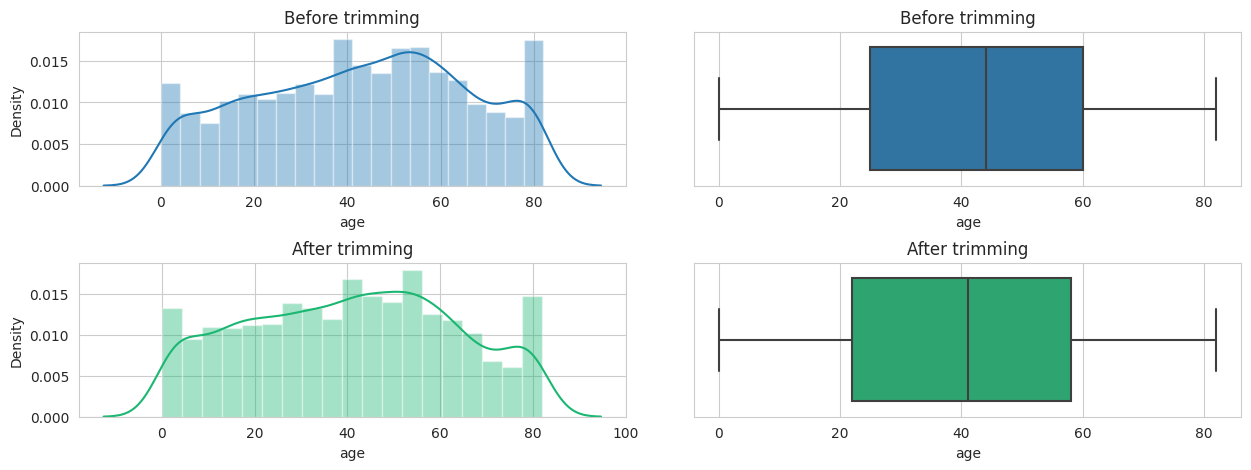

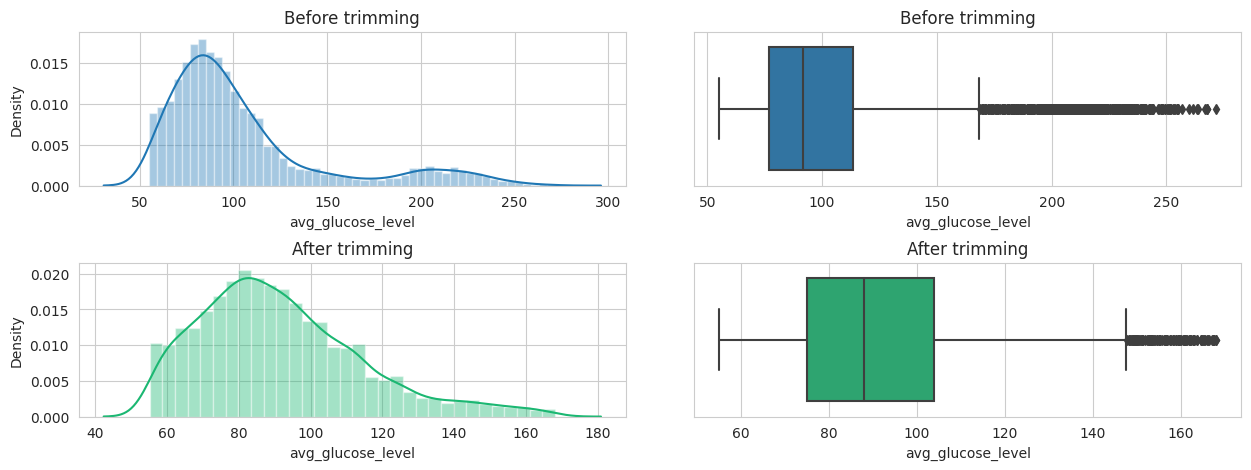

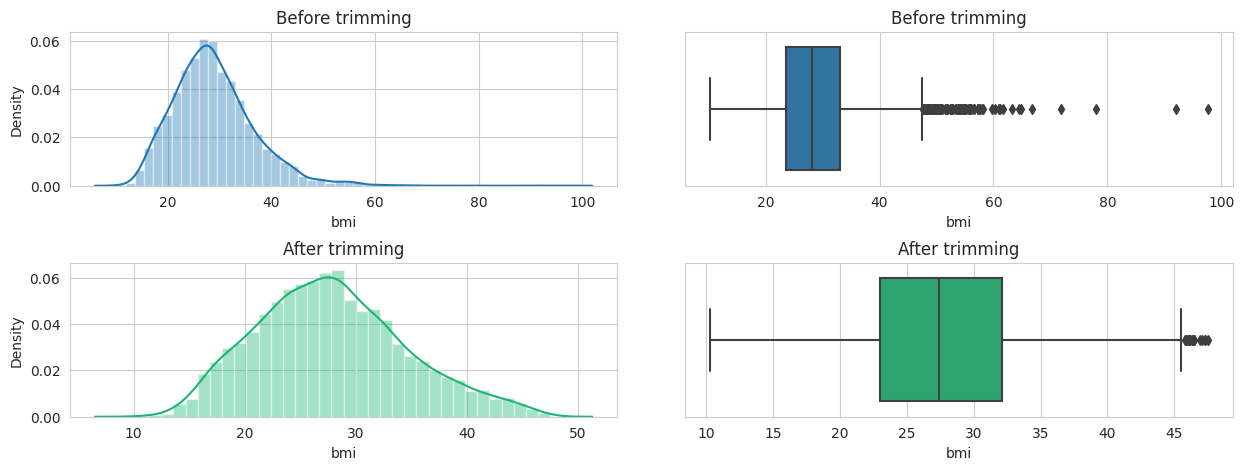

In [ ]:
for col in cols_with_outliers:
    plt.figure(figsize=(15,5))
    plt.subplots_adjust(hspace=.5, wspace=.125)

    plt.subplot(2, 2, 1)
    sns.distplot(df4[col]).set(title="Before trimming")

    plt.subplot(2, 2, 2)
    sns.boxplot(x= df4[col]).set(title="Before trimming")

    plt.subplot(2, 2, 3)
    sns.distplot(df_trimmed[col], color="#1BB772").set(title="After trimming")

    plt.subplot(2, 2, 4)
    sns.boxplot(x= df_trimmed[col], color="#1BB772").set(title="After trimming")


3.2.4.2 Using capping method to handle the outliers

In [ ]:
df_capped = df4.copy()
for col in cols_with_outliers:
    q1 = df_capped[col].quantile(.25)
    q3 = df_capped[col].quantile(.75)

    IQR = q3- q1
    lower_bound = q1 - (1.5* IQR)
    upper_bound = q3 + (1.5* IQR)

    df_capped[col] = np.where(df_capped[col] > upper_bound, upper_bound,
                                np.where(df_capped[col] < lower_bound,
                                         lower_bound, df_capped[col]))
print(f"With outliers, the shape of the dataset is: {df4.shape}\nWithout outliers, the shape of the dataset is: {df_capped.shape}")

With outliers, the shape of the dataset is: (4909, 11)
Without outliers, the shape of the dataset is: (4909, 11)


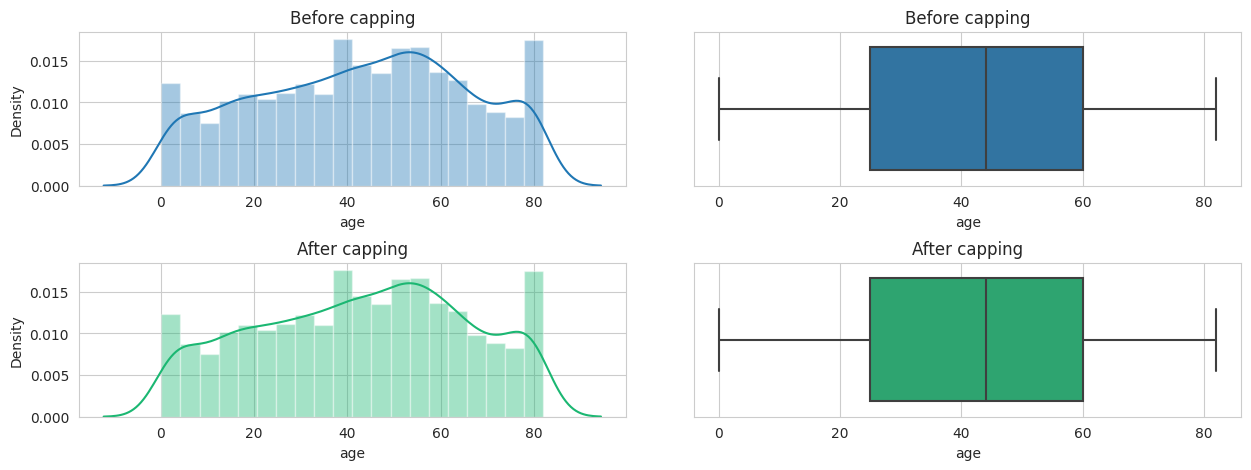

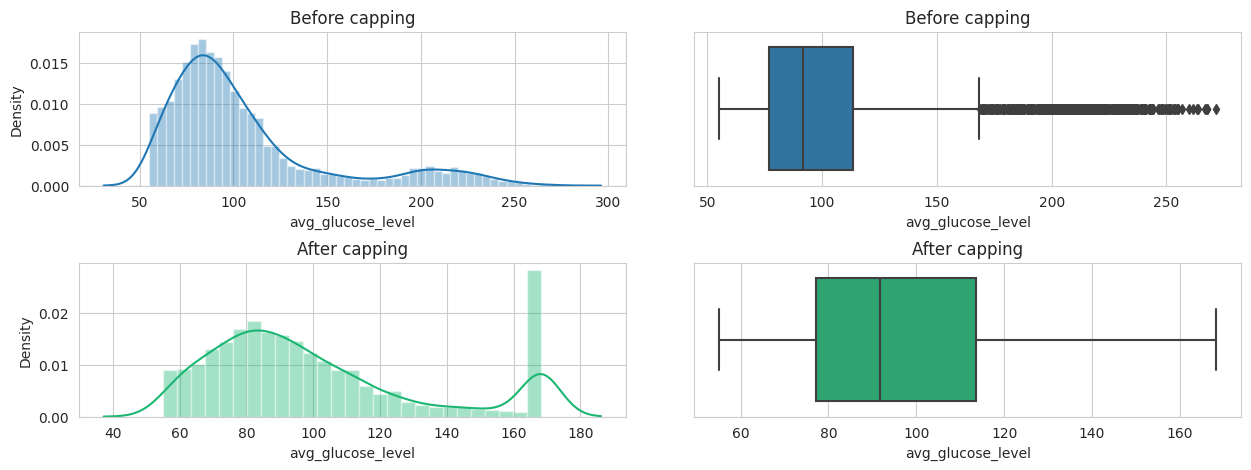

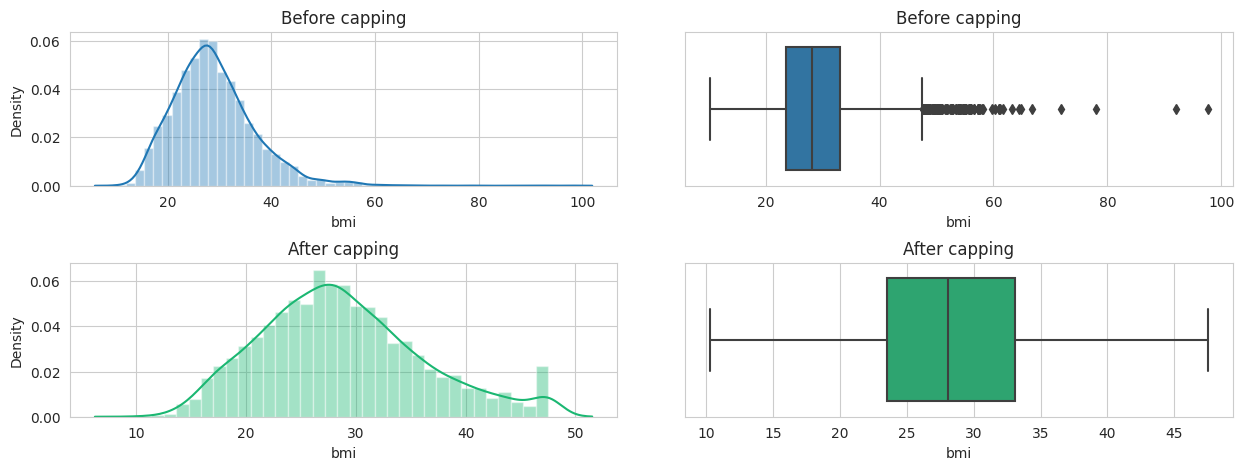

In [ ]:
for col in cols_with_outliers:
    plt.figure(figsize=(15,5))
    plt.subplots_adjust(hspace=.5, wspace=.125)

    plt.subplot(2, 2, 1)
    sns.distplot(df4[col]).set(title="Before capping")

    plt.subplot(2, 2, 2)
    sns.boxplot(x= df4[col]).set(title="Before capping")

    plt.subplot(2, 2, 3)
    sns.distplot(df_capped[col], color="#1BB772").set(title="After capping")

    plt.subplot(2, 2, 4)
    sns.boxplot(x= df_capped[col], color="#1BB772").set(title="After capping")

3.3 Resampling the imbalanced data

In [ ]:
df_capped.shape

(4909, 11)

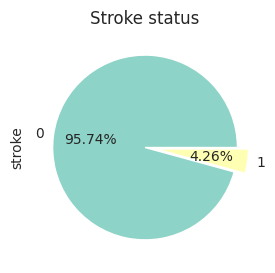

In [ ]:
y = df_capped["stroke"]
plt.figure(figsize=(5, 3))
y.value_counts().plot.pie(autopct="%1.2f%%", colors=sns.color_palette('Set3'), explode=[0, 0.12], title="Stroke status");

<Axes: title={'center': 'Count stroke status'}>

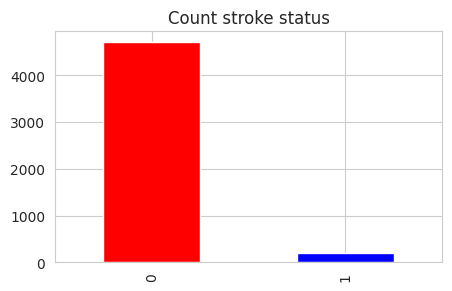

In [ ]:
plt.figure(figsize=(5, 3))
df_capped['stroke'].value_counts().plot(kind='bar', title='Count stroke status', color=['red', 'blue'])

In [ ]:
# Class count
count_class_0, count_class_1 = df_capped['stroke'].value_counts()
print(count_class_0)
print(count_class_1)

# Divide by class
df_class_0 = df_capped[df_capped['stroke'] == 0]
df_class_1 = df_capped[df_capped['stroke'] == 1]

4700
209


3.3.1 Random under-sampling

Random under-sampling:
0    209
1    209
Name: stroke, dtype: int64
Shape of the new dataset is (418, 11)



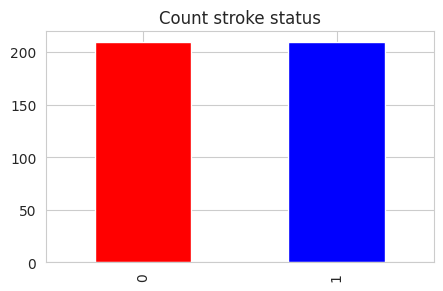

In [ ]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under['stroke'].value_counts())

plt.figure(figsize=(5, 3))
y = df_test_under['stroke'].value_counts().plot(kind='bar', title='Count stroke status', color=['red', 'blue'])
print(f"Shape of the new dataset is {df_test_under.shape}\n")

3.3.2 Random over-sampling

Random under-sampling:
0    4700
1    4700
Name: stroke, dtype: int64
Shape of the new dataset is (9400, 11)



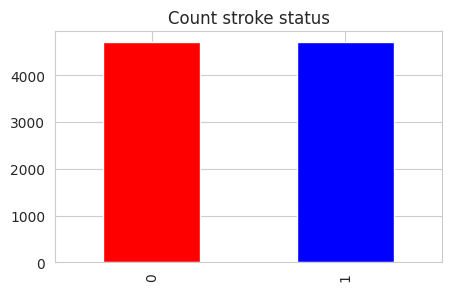

In [ ]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random under-sampling:')
print(df_test_over['stroke'].value_counts())

plt.figure(figsize=(5, 3))
y = df_test_over['stroke'].value_counts().plot(kind='bar', title='Count stroke status', color=['red', 'blue'])
print(f"Shape of the new dataset is {df_test_over.shape}\n")

3.4 Data splitting and scalling

In [ ]:
# Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split

X = df_test_over.drop(columns='stroke')
y = df_test_over['stroke']

# Using stratify kFold
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 20, stratify = y)

In [ ]:
cols_to_scale= []
for f in X.columns:
    if X[f].max() > 1:
        cols_to_scale.append(f)
cols_to_scale

['gender', 'age', 'work_type', 'avg_glucose_level', 'bmi', 'smoking_status']

In [ ]:
# Before scalling the data
X_train[cols_to_scale].sample(5)

,gender,age,work_type,avg_glucose_level,bmi,smoking_status
2623,0,65.0,2,70.06,35.8,0
2455,0,14.0,2,168.32,22.9,2
182,0,32.0,2,76.13,29.9,3
185,1,63.0,2,137.30,31.7,1
148,0,57.0,0,67.41,32.9,2


In [ ]:
# Using MinMaxScaler to scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Caution! We ned to keep in mind that, while scaling, we need to consider only the train set while training the scaling model,
# because if the whole dataset is considered, the model might get some value from the test set which makes the model biased.
scaler.fit(X_train[cols_to_scale])
X_train[cols_to_scale] = scaler.transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [ ]:
# After scalling the data
X_train[cols_to_scale].sample(5)

,gender,age,work_type,avg_glucose_level,bmi,smoking_status
219,0.5,0.890137,0.00,1.000000,0.491935,0.666667
69,0.0,0.975586,0.75,0.155035,0.500000,0.666667
56,0.0,1.000000,0.50,0.037102,0.615591,0.666667
106,0.0,0.609375,0.50,0.159541,0.537634,0.333333
1714,0.5,0.096680,1.00,0.407597,0.631720,0.000000


4. Building models¶

4.1 Decision Tree Classifier

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(criterion='entropy')
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred = dt_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, dt_clf.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1410
           1       0.95      1.00      0.97      1410

    accuracy                           0.97      2820
   macro avg       0.97      0.97      0.97      2820
weighted avg       0.97      0.97      0.97      2820

Train Accuracy:  1.0
Test Accuracy:  0.9730496453900709


4.2 KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2) # Euclidean Distance Metrics
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, dt_clf.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93      1410
           1       0.89      1.00      0.94      1410

    accuracy                           0.94      2820
   macro avg       0.94      0.94      0.94      2820
weighted avg       0.94      0.94      0.94      2820

Train Accuracy:  1.0
Test Accuracy:  0.9354609929078014


4.3 Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(X_test)

print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, gnb.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75      1410
           1       0.76      0.72      0.74      1410

    accuracy                           0.75      2820
   macro avg       0.75      0.75      0.75      2820
weighted avg       0.75      0.75      0.75      2820

Train Accuracy:  0.7544072948328268
Test Accuracy:  0.7464539007092199


4.4 Support Vector Classifier

In [ ]:
from sklearn.svm import SVC
svc= SVC()
svc.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = svc.predict(X_test)

print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, svc.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80      1410
           1       0.78      0.86      0.82      1410

    accuracy                           0.81      2820
   macro avg       0.81      0.81      0.81      2820
weighted avg       0.81      0.81      0.81      2820

Train Accuracy:  0.8141337386018237
Test Accuracy:  0.8113475177304964


4.5 Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_regr = LogisticRegression()
log_regr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = log_regr.predict(X_test)

print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, log_regr.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76      1410
           1       0.76      0.79      0.77      1410

    accuracy                           0.77      2820
   macro avg       0.77      0.77      0.77      2820
weighted avg       0.77      0.77      0.77      2820

Train Accuracy:  0.774468085106383
Test Accuracy:  0.7687943262411348


4.6 Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_regr = RandomForestClassifier(n_estimators=120, criterion='entropy', random_state=1)
rf_regr.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=120, random_state=1)

In [ ]:
y_pred = rf_regr.predict(X_test)

print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, rf_regr.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1410
           1       0.98      1.00      0.99      1410

    accuracy                           0.99      2820
   macro avg       0.99      0.99      0.99      2820
weighted avg       0.99      0.99      0.99      2820

Train Accuracy:  1.0
Test Accuracy:  0.9921985815602837


4.7 Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
models= [("DecissionTree",dt_clf), ("KNN", knn_clf), ("NaiveBayes",gnb), ("SupportVector", svc),
                                ("LogisticRegression",log_regr), ("RandomForest",rf_regr)]
vc= VotingClassifier(estimators=models)
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('DecissionTree',
                              DecisionTreeClassifier(criterion='entropy')),
                             ('KNN', KNeighborsClassifier()),
                             ('NaiveBayes', GaussianNB()),
                             ('SupportVector', SVC()),
                             ('LogisticRegression', LogisticRegression()),
                             ('RandomForest',
                              RandomForestClassifier(criterion='entropy',
                                                     n_estimators=120,
                                                     random_state=1))])

In [ ]:
y_pred = vc.predict(X_test)

print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, vc.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1410
           1       0.90      0.86      0.88      1410

    accuracy                           0.88      2820
   macro avg       0.89      0.88      0.88      2820
weighted avg       0.89      0.88      0.88      2820

Train Accuracy:  0.9045592705167174
Test Accuracy:  0.8847517730496454


4.8 Bagging Classifier

In [ ]:
# Bagging using decision tree classifier
from sklearn.ensemble import BaggingClassifier
bag_clf= BaggingClassifier(estimator= dt_clf, n_estimators=10)
bag_clf.fit(X_train, y_train)

y_pred = bag_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, bag_clf.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1410
           1       0.97      1.00      0.99      1410

    accuracy                           0.99      2820
   macro avg       0.99      0.99      0.99      2820
weighted avg       0.99      0.99      0.99      2820

Train Accuracy:  0.9990881458966565
Test Accuracy:  0.9861702127659574


In [ ]:
# Bagging using KNN classifier
from sklearn.ensemble import BaggingClassifier
bag_clf= BaggingClassifier(estimator= knn_clf, n_estimators=10)
bag_clf.fit(X_train, y_train)

y_pred = bag_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, bag_clf.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93      1410
           1       0.88      1.00      0.94      1410

    accuracy                           0.93      2820
   macro avg       0.94      0.93      0.93      2820
weighted avg       0.94      0.93      0.93      2820

Train Accuracy:  0.9503039513677811
Test Accuracy:  0.9347517730496454


4.9 Stacking Classifier

In [ ]:
from sklearn.ensemble import StackingClassifier
models= [("DecissionTree",dt_clf), ("KNN", knn_clf), ("NaiveBayes",gnb), ("SupportVector", svc),
                                ("LogisticRegression",log_regr), ("RandomForest",rf_regr)]
stc_clf= StackingClassifier(estimators=models, final_estimator= log_regr, cv = 10)
stc_clf.fit(X_train, y_train)

StackingClassifier(cv=10,
                   estimators=[('DecissionTree',
                                DecisionTreeClassifier(criterion='entropy')),
                               ('KNN', KNeighborsClassifier()),
                               ('NaiveBayes', GaussianNB()),
                               ('SupportVector', SVC()),
                               ('LogisticRegression', LogisticRegression()),
                               ('RandomForest',
                                RandomForestClassifier(criterion='entropy',
                                                       n_estimators=120,
                                                       random_state=1))],
                   final_estimator=LogisticRegression())

In [ ]:
y_pred = stc_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, stc_clf.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1410
           1       0.99      1.00      1.00      1410

    accuracy                           1.00      2820
   macro avg       1.00      1.00      1.00      2820
weighted avg       1.00      1.00      1.00      2820

Train Accuracy:  1.0
Test Accuracy:  0.9968085106382979


4.10 Boosting Classifier


In [ ]:
# Boosting using XGBoost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# split data into train and test sets
seed=7
test_size=0.33
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=test_size,random_state=seed)

In [ ]:
# fit model to training data
model=XGBClassifier()
model.fit(X_train,y_train)

In [ ]:
print(model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


Making prediction with the XGBoost Model

In [ ]:
# make prediction for test data
y_pred = model.predict(X_test)
predictions=[round(value) for value in y_pred]

# evaluate predictions
print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train,stc_clf.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))
accuracy=accuracy_score(y_test,predictions)
print("Accuracy: %.2f%%" % (accuracy*100.0))



              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1568
           1       0.95      1.00      0.97      1534

    accuracy                           0.97      3102
   macro avg       0.98      0.97      0.97      3102
weighted avg       0.98      0.97      0.97      3102

Train Accuracy:  0.5001587805652589
Test Accuracy:  0.9745325596389426
Accuracy: 97.45%
